In [1]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
import numpy as np
from skimage.feature import hog

In [4]:
# Ignore warnings in notebook
import warnings
warnings.filterwarnings('ignore')

In [ ]:
cd ..

In [6]:
from utils import *

# Using Histogram Histograms of Oriented Gradients for Chromosome detection 
### Based on [Dalal - Triggs Method]("https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf") 

In [7]:
path = "/positive/"

In [8]:
path_n = "/negative/"

# Feature X (Pos, X1 and Neg, X2)

In [9]:
X, X1, X2, titles_pos, titles_neg =  load_data.dataset(path, path_n)

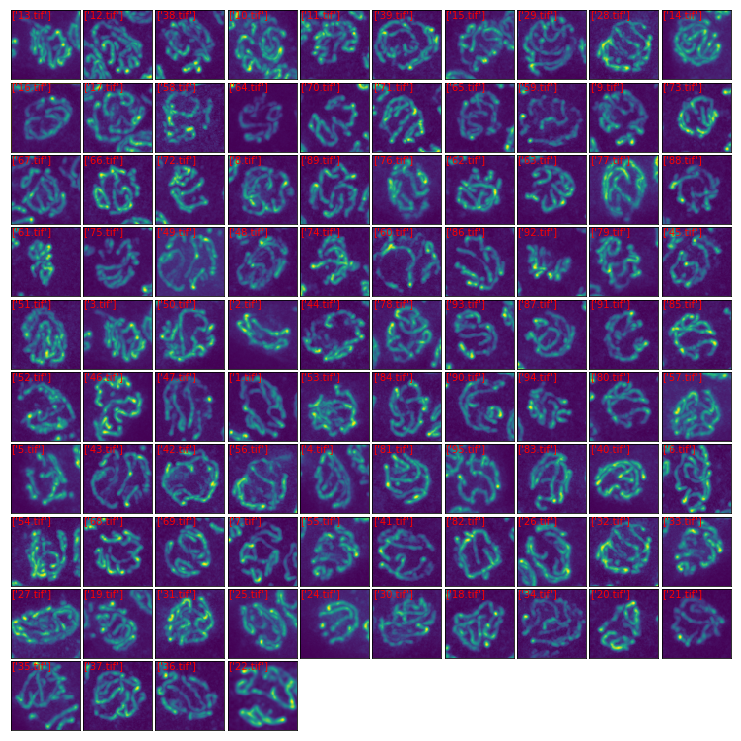

In [10]:
visualization.plot_mosaic(X1, titles_pos)

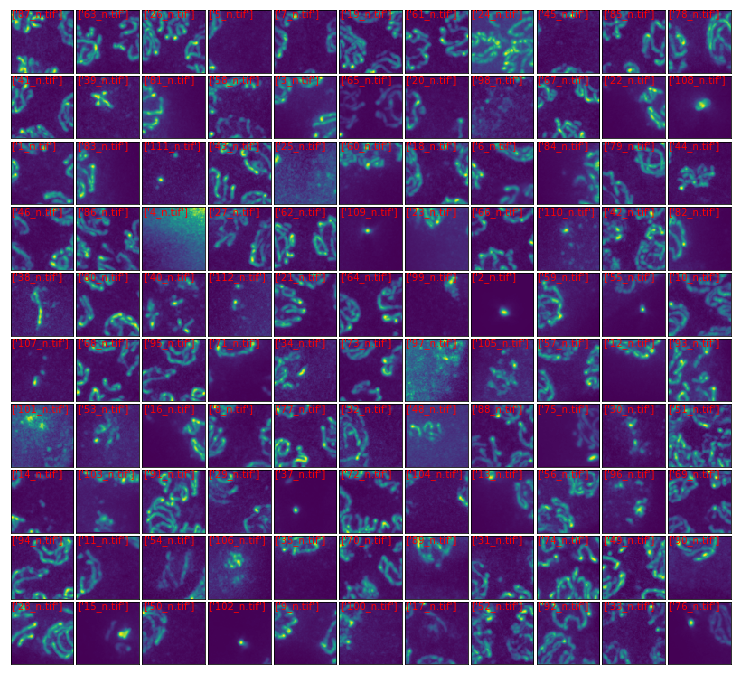

In [11]:
visualization.plot_mosaic(X2, titles_neg)

# Example HoG (Histo of horiented Gradient)  feature on chromosome

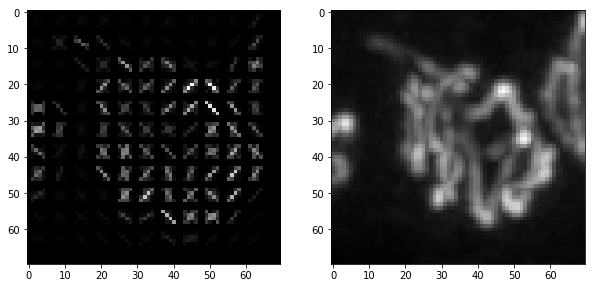

In [12]:
fd, hog_image = hog(X[0], orientations=8, pixels_per_cell=(6, 6),block_norm='L1',
                    cells_per_block=(3, 3), visualize=True, multichannel=False)
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(hog_image)
ax[1].imshow(X[0])

# Target Y, either 0 (Neg) or 1 (Pos)

In [13]:
y_pos = np.ones(len(X1))
y_neg = np.zeros(len(X2))
Y = np.hstack((y_pos, y_neg))

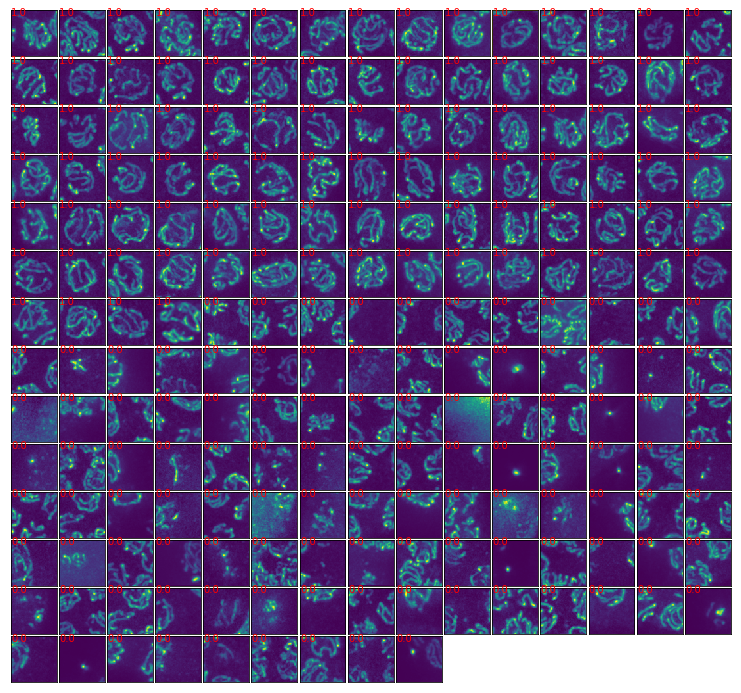

In [14]:
visualization.plot_mosaic(X, Y)

# Split data into training set and test set

In [15]:

from sklearn.preprocessing import StandardScaler

### First we convert all the images Features into HoG Features and split the data

In [16]:
X_train, X_test, y_train, y_test, dat = build_classifier.hog_convert_split(X, Y)

# The we scale the data to avoid having one feature beging disporportionaly important 

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
X_train = scaler.transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

### Train our classifier
Some help on how to chose your estimator:
https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
pred = clf.predict(X_test)

### Evaluation of the object detection  (our classifier)

In [23]:
print(confusion_matrix(y_test,pred))

[[23  1]
 [ 1 26]]


In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        24
         1.0       0.96      0.96      0.96        27

   micro avg       0.96      0.96      0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



The precision tell me that from the number of chromosome the classifier found, how many were true.
Recall tell me, out of all the chromosome I was suppose to found, how many did I found. 

# Learning curve

Will allow to find if our learning algorithm suffer from high bias (underfit) or high variance (overfitting)

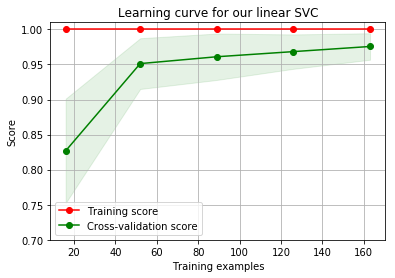

In [25]:
visualization.plot_learning_curve(dat, Y, clf)

# We can now save our classifier and scaler

In [26]:
path = "/clf_scaler/"

In [29]:
load_data.save_file(path, "clf", clf)
load_data.save_file(path, "scaler", scaler)